# Tarea 12

Fragoso Alvarado Daniel

## Introducción
Los datos obtenidos a partir de observaciones recogidas a lo largo del tiempo son extremadamente
comunes. En los negocios, observamos las tasas de interés de la semana, los precios de cierre de las
acciones diarios, los índices de precios mensuales, las cifras de ventas anuales, y así sucesivamente.
En meteorología, observamos las temperaturas máximas y mínimas diarias, los índices anuales de
precipitación y de sequía, y las velocidades del viento por hora. En la agricultura, registramos las
cifras anuales de producción agrícola y ganadera, la erosión del suelo, y las ventas de exportación. En
las ciencias biológicas, observamos la actividad eléctrica del corazón en intervalos de milisegundos.
Una serie de tiempo o serie temporal es una secuencia de datos, observaciones o valores, medidos en
determinados momentos y ordenados cronológicamente. Los datos pueden estar espaciados a
intervalos iguales o desiguales. Una vez que se captura una serie de tiempo, a menudo se realiza un
análisis sobre ella para identificar patrones en los datos, en esencia, lo que se busca es entender que
suceda a medida que el tiempo va avanzando.

In [ ]:
!pip install statsmodels

In [4]:
#-----------------------
# Importemos las librerias
import pandas as pd
import seaborn as sns
from pathlib import Path
from datetime import date
from pandas.tseries.offsets import MonthEnd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#------------------------
sns.set_style("whitegrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [5]:
data = pd.read_csv('AirPassengers.csv')

data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Muestre una gráfica que permita visualizar el número de pasajeros en comparación con las
fechas. De las observaciones del gráfico mencione hacía dónde va la tendencia y el efecto
estacional.

In [6]:
data['Month'] = (pd.to_datetime(data['Month'].str.strip()))


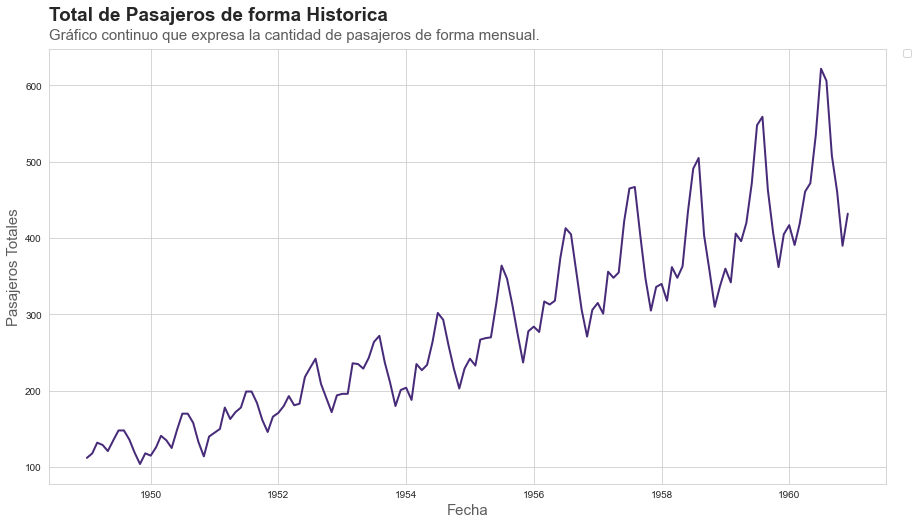

In [7]:
plt.figure(figsize=(16, 10))
sns.lineplot(data.Month, data['#Passengers'], err_style=None, color = '#472B79', lw=2)
#plt.axvline(pd.Timestamp('2001-08-01 00:00:00'), color='#FF9802')
#plt.axvline(pd.Timestamp('2020-01-30 00:00:00'), color='#FF9802')

plt.xlabel('Fecha', fontsize=15, alpha=0.75)
plt.ylabel('Pasajeros Totales', fontsize=15, alpha=0.75)

plt.text(x=pd.Timestamp('1948-06-01 00:00:00'), y=685, s='Total de Pasajeros de forma Historica', fontsize=19, weight='bold')
plt.text(x=pd.Timestamp('1948-06-01 00:00:00'), y=660, s='Gráfico continuo que expresa la cantidad de pasajeros de forma mensual.', fontsize=15, alpha=0.75)


#plt.text(x=pd.Timestamp('2001-12-01 00:00:00'), y=2.25*(10000000), s='Atentado Terrorista\n9 - 11', fontsize=12, weight='bold')
#plt.text(x=pd.Timestamp('2013-01-30 00:00:00'), y=0.75*(10000000), s='Declaración de Pandemia\npor Covid-19', fontsize=12, weight='bold')


figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)

#plt.savefig("/work/Graph/P_H_L.pdf", dpi = 300, bbox_inches='tight')

La tendencia a la alza, y de forma bastante sostenida es clara, a lo largo del tiempo la cantidad de pasajeros se ven incrementados de forma considerable, y hay picos cada año, al rededor de los meses de verano cuando los cuales son los meses de periodos vacacionales.

Elabore un gráfico que muestre la descomposición de la serie temporal en sus componentes
individuales, considere un modelo Aditivo y un modelo Multiplicativo.

In [8]:
data2 = data.set_index('Month')

### Modelo Aditivo

<Figure size 1152x720 with 0 Axes>

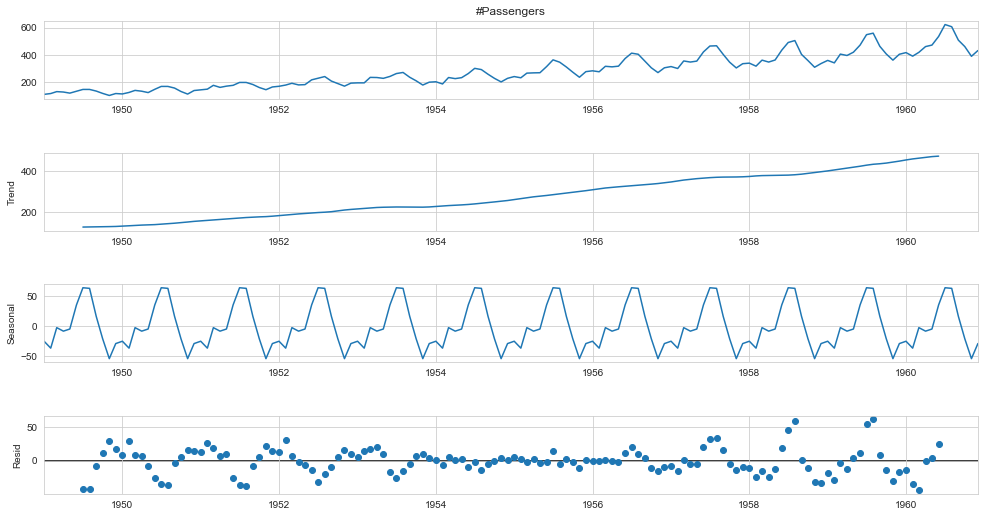

In [9]:
descomposicion = sm.tsa.seasonal_decompose(data2['#Passengers'],
                                            model='additive') 

plt.figure(figsize=(16, 10)) 
fig = descomposicion.plot()
fig.set_size_inches(15, 8)

### Modelo Multiplicativo

<Figure size 1152x720 with 0 Axes>

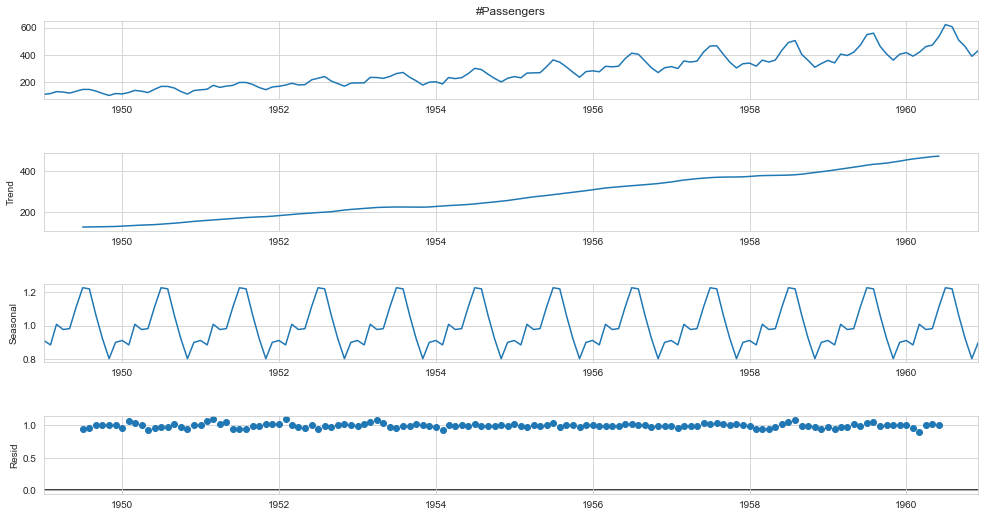

In [10]:
descomposicion = sm.tsa.seasonal_decompose(data2['#Passengers'],
                                            model='multiplicative') 

plt.figure(figsize=(16, 10)) 
fig = descomposicion.plot()
fig.set_size_inches(15, 8)

Recprdemos que:

- Tendencia: Es la dirección a largo plazo de la serie temporal. Este componente suele ser creciente, decreciente o constante. En este caso la tendecia es creciente como ya se venía comentando.

- Estacionalidad: Este es el comportamiento periódico de la serie de tiempo que ocurre dentro de un año. 

- Residual: esto es lo que queda de la serie temporal después de eliminar la tendencia y la estacionalidad.

Ahora notemos que la componente de estacionalidad es independiente de la tendencia creciente que sigue, y por lo tanto el residuo tambien lo es. Esto quiere decir que el **modelo aditivo** es el mejor a aplicar en la descomposición.

Si la estacionalidad y los residuos son independientes de la tendencia en la serie de tiempo graficada, usamos un modelo aditivo para descomponer los datos. El siguiente gráfico muestra el caso en el que se utilizó un modelo de serie de tiempo aditivo para descomponer los datos.

- ¿Qué tipo de estacionariedad se presenta?

Dado que hay una variación en la tendencia de nuestra serie de tiempo, en principio no se trata de una serie estacionaria. Sin embargo sí tiene un componentes estacionario; y es lo que buscamos descomponer en las figuras.

- ¿Por qué se requiere la estacionariedad?

Es importante para el uso de modelos, o como parte del mismo análisis de la serie de tiempo. Ayuda a mejorar la precisión de la predicción, pues agrega un componenete repetitivo a la serie.

- ¿Cómo comprobar la estacionariedad?

Hay varias formas de comprobar la estacionaridad, la descomposición de la serie como se hizo puede decirnos si en fecto, hay una componente que si cambia en el timepo no cambia la forma de la distribución. Y por lo tanto no tener una tendencia. Tambien existen test que se encargan de indicar si una serie es estacionaria o no, por ejemplo el test de Dickey-Fuller Aumentado.

- ¿Cómo hacer series de tiempo estacionarias?

Se pueden generar diferentes transformaciones que nos permiten eliminar la tebdencia, como por ejemplo la diferencia de la serie original con la serie tras una tranformación logaritmica. Según la serie, habrá que aplicar más transformaciones según sus aplicaciones.

### Determine y trace las estadísticas móviles (promedios móviles).

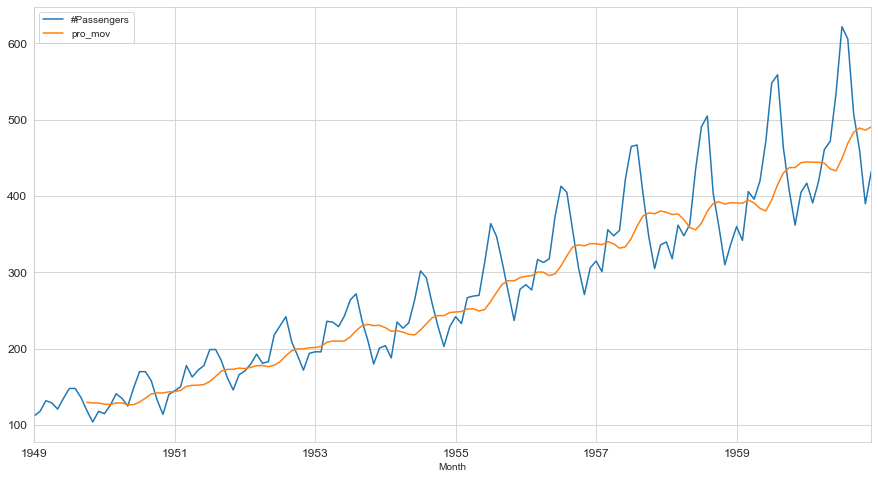

In [11]:
promedios_mov = data2['#Passengers'].rolling(10).mean()
data2['pro_mov'] = promedios_mov
plot = data2[['#Passengers', 'pro_mov']].plot(figsize=(15, 8), fontsize=12)

En el modelo ARITMA se hace uso de pasos de filtrado como el promedio movil y la descomposición de la serie de timepo con el fin de que al final de la sransformaciones solo tengamos ruido aleatorio. Lo que permite ajustar los parámmeros del modelo egun la periodicidad, y la tendencia registrada, entre ptros factores, valores muchos más limpios lo que facilita generar la regresión.

### Realice un pronostico utilizando el modelo ARIMA.

Vamos a importar librerias especiales para la aplicación del ARIMA.

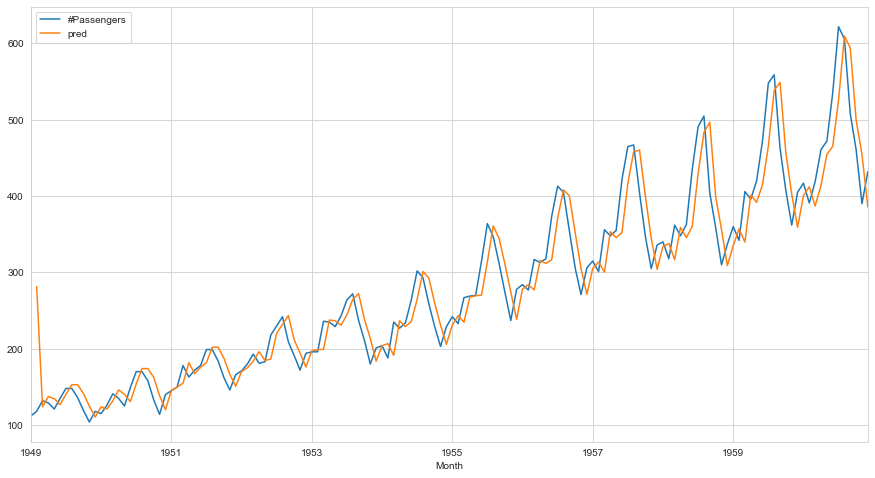

In [12]:
# Modelo ARIMA
modelo = sm.tsa.ARIMA(data2['#Passengers'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit()  
data2['pred'] = resultados.fittedvalues  
plot = data2[['#Passengers', 'pred']].plot(figsize=(15, 8))  

In [ ]:
!pip install scalecast

In [ ]:
!pip install pmdarima 

In [24]:
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns

f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])

Vamos a generar una predicción con la libreria `Forecaster`. Vamos a generar 2 conjuntos de Datos, uno de entrenamiento y otro de test para ver que tan efectiva es la predicción. Y además vamos a agregar los intervalos de confianza.

0.8153688792060472
0.991880243437641


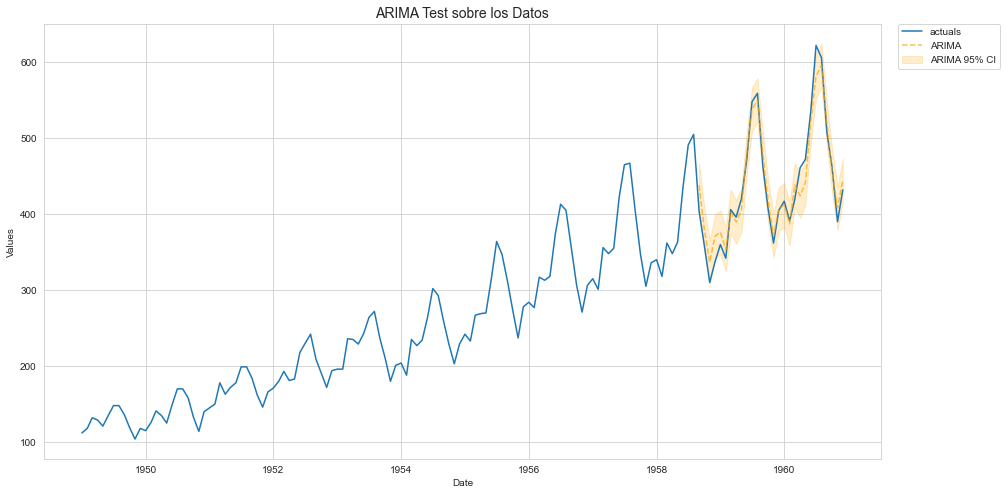

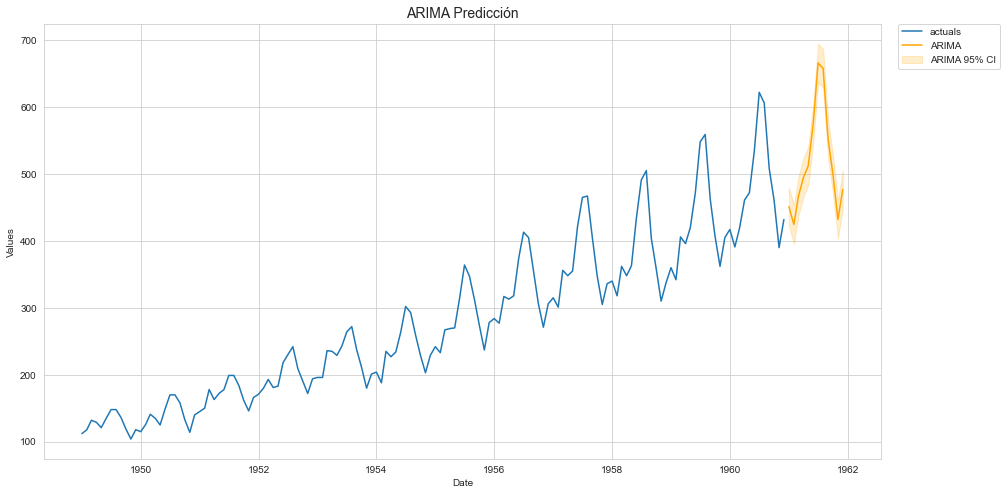

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.927
Date:                          Tue, 10 May 2022   AIC                           1015.854
Time:                                  21:11:52   BIC                           1033.105
Sample:                                       0   HQIC                          1022.864
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0756      0.280     -0.270      0.787      -0.624       0.473
ma.L1         -0.3553      0.253     -1.402      0.161      -0.852       0.141
ar.S.L12       0.6664      0.152      4.380      0.000       0.368       0.965
ar.S.L24       0.3321      0.098      3.374      0.001       0.139       0.525
ma.S.L12      -0.9736      1.151     -0.846      0.398      -3.230       1.283
sigma2       110.5004    105.963      1.043      0.297     -97.184     318.185
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.83
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
f.generate_future_dates(12) # meses a predecir
f.set_test_length(.2) # Selección de datos de prueba
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') 

# EDA
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

# Forecast
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='ARIMA')


# Ver la predicción de prueba con datos que ya tenemos
f.plot_test_set(ci=True,models='ARIMA')
plt.title('ARIMA Test sobre los Datos',size=14)
figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)
plt.show()

# Predicción de los proximos 12 meses
f.plot(ci=True,models='ARIMA')
plt.title('ARIMA Predicción',size=14)
figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)
plt.show()

# See summary stats
f.regr.summary()

Vamos a generar una segunda predicción por 4 años posteriores.

0.8153688792060472
0.991880243437641


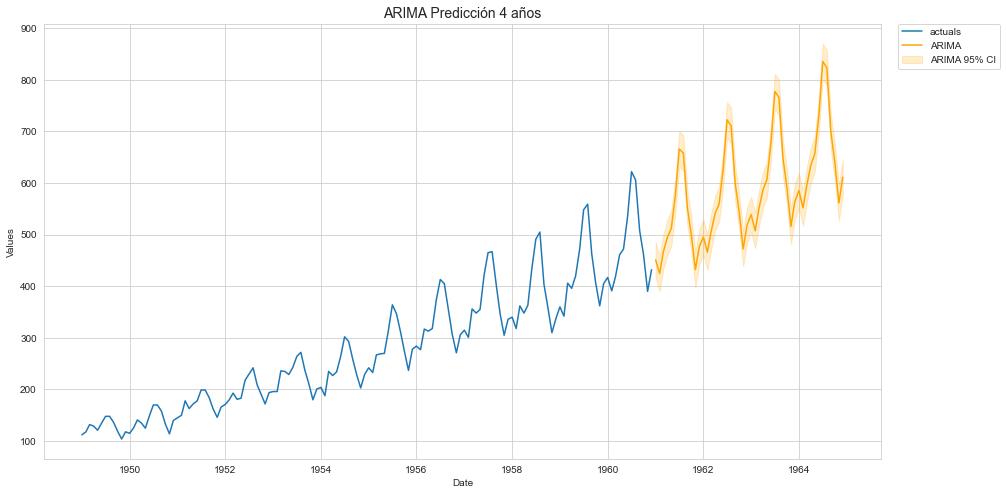

In [34]:
f.generate_future_dates(48) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

# EDA
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

# Forecast
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='ARIMA')


# View forecast results
f.plot(ci=True,models='ARIMA')
plt.title('ARIMA Predicción 4 años',size=14)
figure = plt.gcf()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

figure.set_size_inches(15, 8)
plt.show()
